In [1]:
###--------------
###Import Library
###--------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


### Seperate the input output data

In [3]:
x = df['Resume']
y = df['Category']

<Axes: xlabel='count', ylabel='Category'>

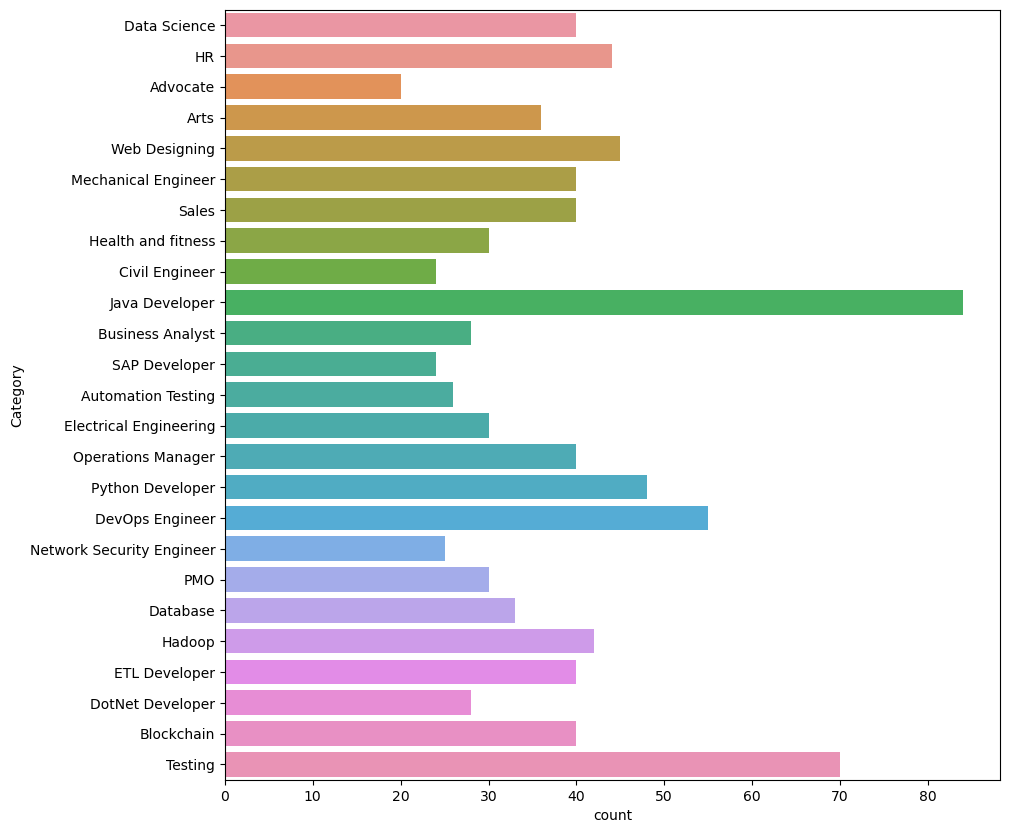

In [4]:
plt.figure(figsize=(10,10))
sns.countplot(y = y)

### Plotting using piechart

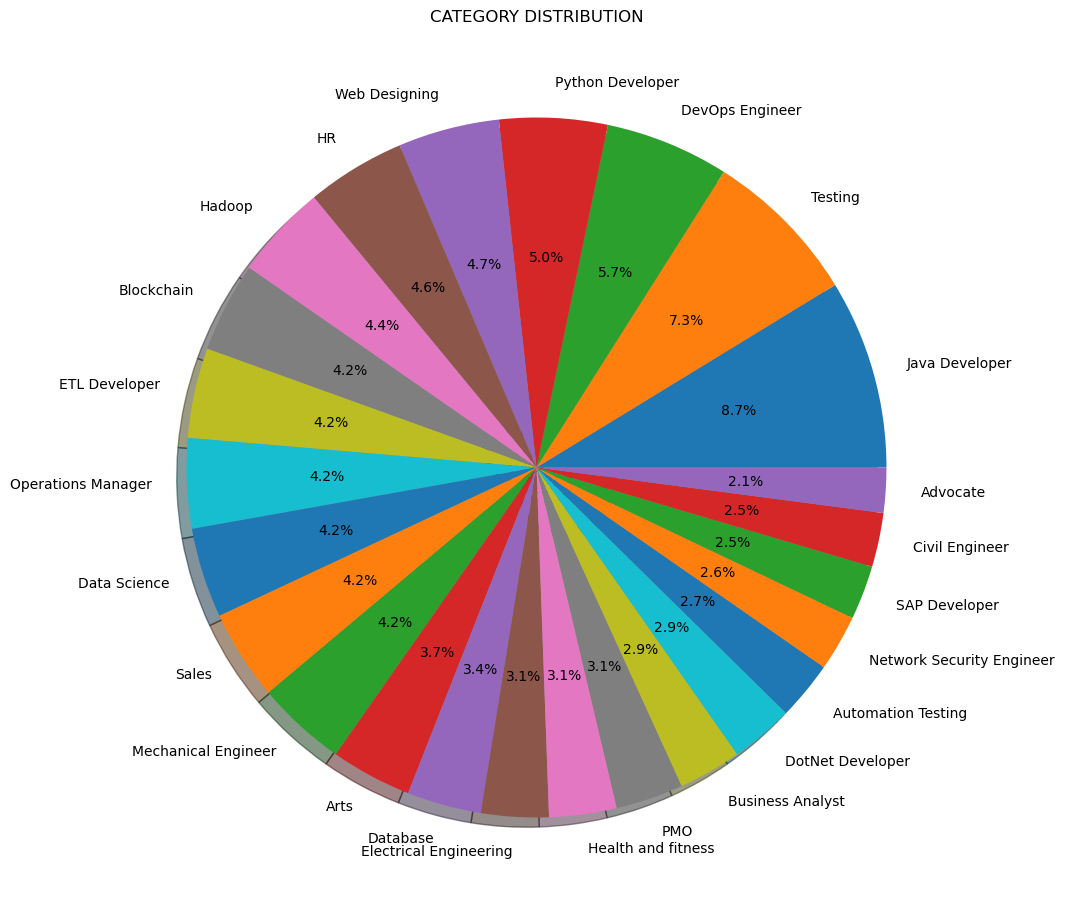

In [5]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Category'].value_counts()
targetLabels = df['Category'].value_counts().index

#Make square fig and axis
plt.figure(1,figsize=(25,25))
the_grid = GridSpec(2,2)

plt.subplot(the_grid[0,1],aspect=1,
           title = 'CATEGORY DISTRIBUTION');

plt.pie(targetCounts,labels=targetLabels,shadow=True,autopct='%1.1f%%');

In [6]:
import re

In [7]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*',' ', resumeText)
    resumeText = re.sub('RT|cc', ' ', resumeText)
    resumeText = re.sub('#\S+', ' ', resumeText)
    resumeText = re.sub('@\S+', ' ', resumeText)
    resumeText = re.sub('[%s]'% re.escape("""!"#$'()*+,-./:;<=>?@[\]^_`{|}~"""),
                        ' ', resumeText)
    # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)
    # remove extra whitespaces
    return resumeText                        

In [8]:
cleanResume(df['Resume'][17])

'Education Details B Tech Rayat and Bahra Institute of Engineering and Biotechnology Data Science Data Science Skill Details Numpy Exprience Less than 1 year months Machine Learning Exprience Less than 1 year months Tensorflow Exprience Less than 1 year months Scikit Exprience Less than 1 year months Python Exprience Less than 1 year months GCP Exprience Less than 1 year months Pandas Exprience Less than 1 year months Neural Network Exprience Less than 1 year monthsCompany Details company Wipro description Bhawana Aggarwal E Mail bhawana chd Phone 09876971076 VVersatile high energy professional targeting challenging assignments in Machine PROFILE SUMMARY An IT professional with knowledge and experience of 2 years in Wipro Technologies in Machine Learning Deep Learning Data Science Python Software Development Skilled in managing end to end development and software products projects from inception requirement specs planning designing implementation configuration and documentation Knowled

In [9]:
!pip install wordcloud

In [10]:
import nltk 
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [11]:
swords = stopwords.words('english')
totalwords = []

Sentences =df['Resume'].values
cleanedSentence = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentence += cleanedText
    requiredWord =nltk.word_tokenize(cleanedText)
    for word in requiredWord:
        if word.lower() not in swords:
            totalwords.append(word.lower())

In [12]:
len(totalwords)

33552

In [13]:
wordfreqdist = nltk.FreqDist(totalwords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('details', 488), ('exprience', 446), ('data', 416), ('company', 398), ('months', 394), ('description', 358), ('1', 290), ('&', 270), ('project', 254), ('year', 252), ('january', 216), ('learning', 210), ('science', 208), ('less', 204), ('skill', 190), ('python', 176), ('maharashtra', 166), ('6', 164), ('machine', 156), ('education', 146), ('college', 146), ('arts', 144), ('university', 140), ('skills', 134), ('development', 134), ('web', 134), ('like', 126), ('analytics', 120), ('india', 120), ('management', 120), ('application', 120), ('team', 116), ('software', 116), ('using', 110), ('business', 108), ('sql', 104), ('developed', 104), ('monthscompany', 102), ('time', 100), ('used', 98), ('b', 98), ('c', 98), ('experience', 96), ('mumbai', 96), ('projects', 94), ('knowledge', 94), ('analysis', 92), ('technologies', 92), ('hr', 92), ('engineering', 90)]


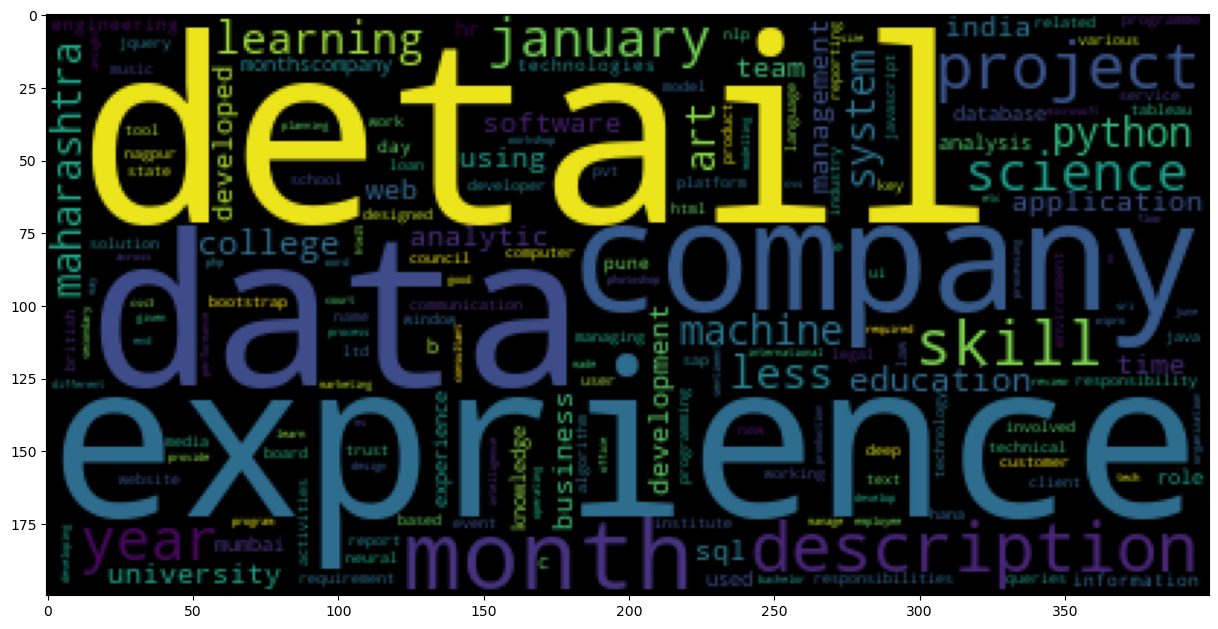

In [14]:
wc1 = WordCloud(collocations =False).generate(" ".join(totalwords))
plt.figure(figsize=(15,15))
plt.imshow(wc1)
plt.savefig('wordcloud.jpg')

In [15]:
x = df['Resume']
y = df['Category']

### TF-IDF Vectorizer

In [16]:
cleaned = x.apply(lambda a: cleanResume(a))

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf = TfidfVectorizer()

In [19]:
x_vect = tfidf.fit_transform(cleaned)

In [20]:
x_vect.shape

(962, 7566)

### Cross-validation

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, random_state=0,stratify=y)

In [23]:
x_train.shape , x_test.shape

((721, 7566), (241, 7566))

### Build the model

In [24]:
from sklearn.neighbors import NearestCentroid

In [25]:
clf = NearestCentroid()

In [26]:
clf.fit(x_train, y_train)

NearestCentroid()

### Perform Evaluatiom

In [27]:
y_pred = clf.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

In [29]:
print(classification_report(y_test,y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         5
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      1.00      1.00         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       1.00      0.90      0.95        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         7
            ETL Developer       1.00      1.00      1.00        10
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

In [30]:
test = open('Sample_resume.txt','r')
text = test.read()

In [31]:
sam_cleaned = cleanResume(text)

In [32]:
clf.predict(tfidf.transform([sam_cleaned]))     #tfidf requires  list but text is in array format

array(['Data Science'], dtype=object)